In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data_ford_price.xlsx') 

# Трансформация признаков

Теперь, когда мы вспомнили популярные методы масштабирования, давайте перейдём к другим способам преобразования распределения и скейлинга признаков, доступных в мощной библиотеке sklearn.

→ Скачайте ноутбук с кодом юнита

Quantile Transformer

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

Квантильное преобразование сопоставляет распределение вероятностей переменной с другим распределением вероятностей с использованием квантильной функции.

Квантильная функция, также называемая функцией процентной точки (PPF), является обратной функцией кумулятивного распределения вероятностей (CDF).

CDF — это функция, которая возвращает вероятность значения, равного или меньше заданного значения.

PPF является инверсией этой функции и возвращает значение с заданной вероятностью или ниже неё.

Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

Это квантильное преобразование доступно в библиотеке машинного обучения Python scikit-learn через класс QuantileTransformer.

У класса есть аргумент output_distribution, который может принимать значение 'uniform' или 'normal' (по умолчанию — 'uniform').

Гиперпараметр n_quantiles определяет разрешение отображения или ранжирование наблюдений в наборе данных. Это значение должно быть меньше, чем количество наблюдений в наборе данных, и по умолчанию равно 1000.

Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.



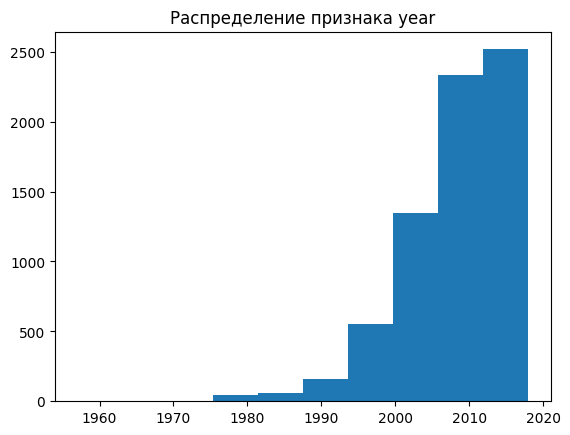

In [3]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

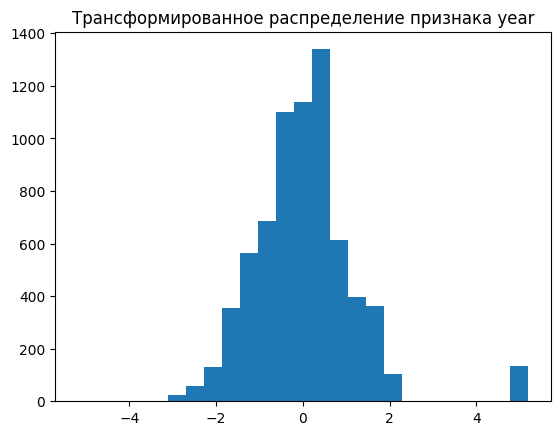

In [4]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

(array([[1.100e+01, 3.380e+02, 2.613e+03, 3.566e+03, 4.720e+02, 1.700e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.100e+01, 5.000e+00,
         2.173e+03, 0.000e+00, 4.816e+03, 1.100e+01]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

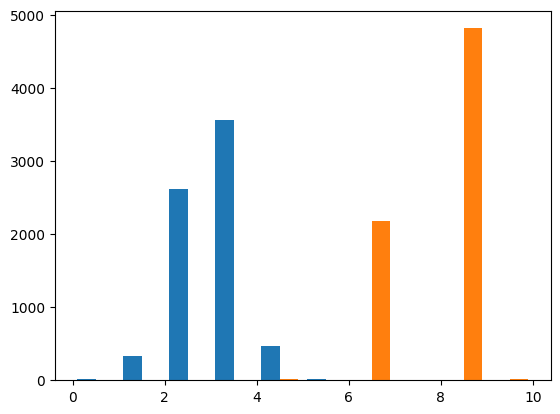

In [23]:
plt.hist(data[['condition', 'cylinders']])

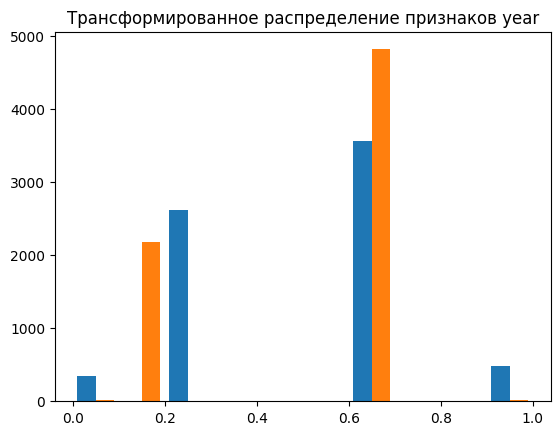

In [24]:
data_for_transform2 = data[['condition', 'cylinders']].values.reshape((len(data), 2))
quantile = QuantileTransformer(output_distribution='uniform')
data_transformed2 = quantile.fit_transform(data_for_transform2)
 
plt.hist(data_transformed2)
plt.title('Трансформированное распределение признаков year')
plt.show()

In [25]:
data_transformed2[0][0]

0.9639639639639639

## Логарифмическое преобразование

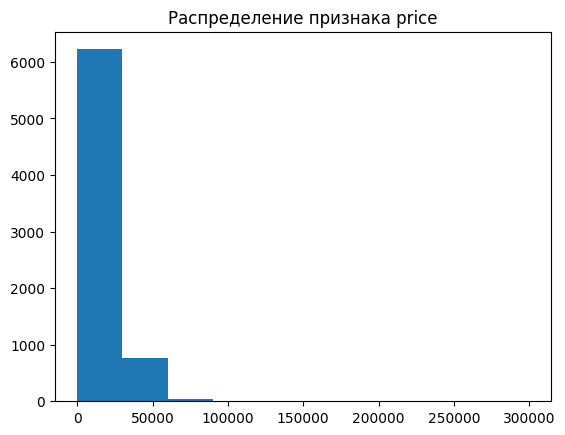

In [26]:
plt.hist(data.price)
plt.title('Распределение признака price');

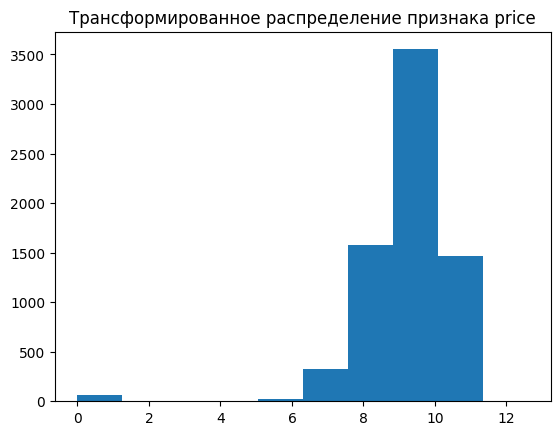

In [27]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [28]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)

price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [35]:
round(price_data['transformed_price'][7016], 2)

9.8

## Преобразование Бокса-Кокса

In [15]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


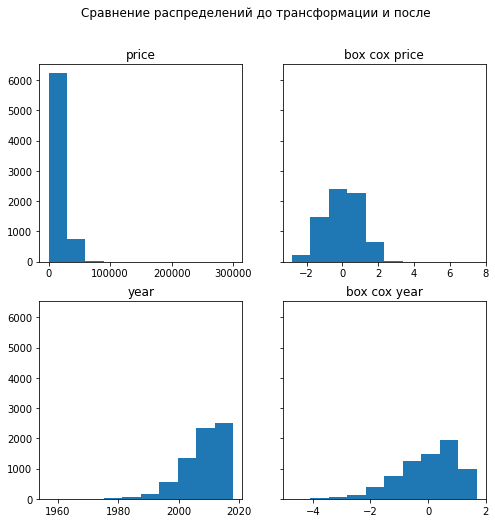

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()